In [43]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary

In [44]:
# 경고 메세지 제거 
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [45]:
import pandas as pd
import os

# 데이터 불러오기
file_name = 'BP_data.csv'
full_file_path = os.path.join(os.getcwd() + "\\" + file_name)
df = pd.read_csv(full_file_path)
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [46]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

Patient_Number - 환자 번호 (고유 식별자)

Blood_Pressure_Abnormality - 혈압 이상 여부

Level_of_Hemoglobin - 헤모글로빈 수치

Genetic_Pedigree_Coefficient - 유전 계수 (가족력 영향 지수)

Age - 나이

BMI - 체질량지수 (Body Mass Index)

Sex - 성별

Pregnancy - 임신 여부

Smoking - 흡연 여부

Physical_activity - 신체 활동 수준

salt_content_in_the_diet - 식단의 염분 함량

alcohol_consumption_per_day - 하루 알코올 섭취량

Level_of_Stress - 스트레스 수준

Chronic_kidney_disease - 만성 신장 질환 여부

Adrenal_and_thyroid_disorders - 부신 및 갑상선 장애 여부

In [47]:
# 결측치 확인
df.isna().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [ ]:
# 결측치 처리(중앙값, 0)
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(df['Genetic_Pedigree_Coefficient'].median())
df['Pregnancy'] = df['Pregnancy'].fillna(0)
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(df['alcohol_consumption_per_day'].median())

In [ ]:
# 결측치 재확인
df.isna().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

## **EDA(탐색적 데이터 분석)**

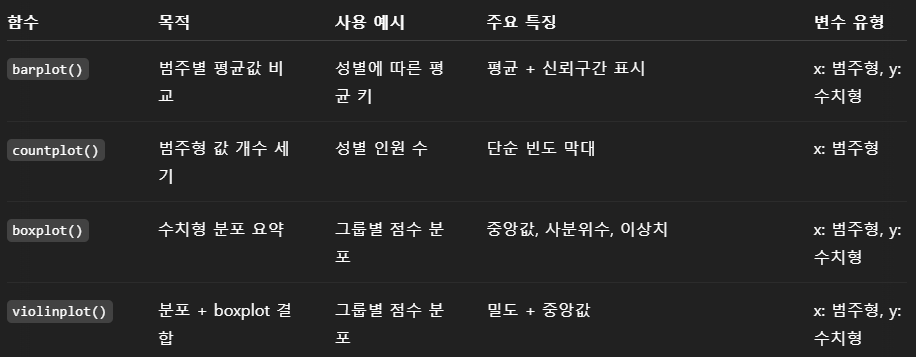
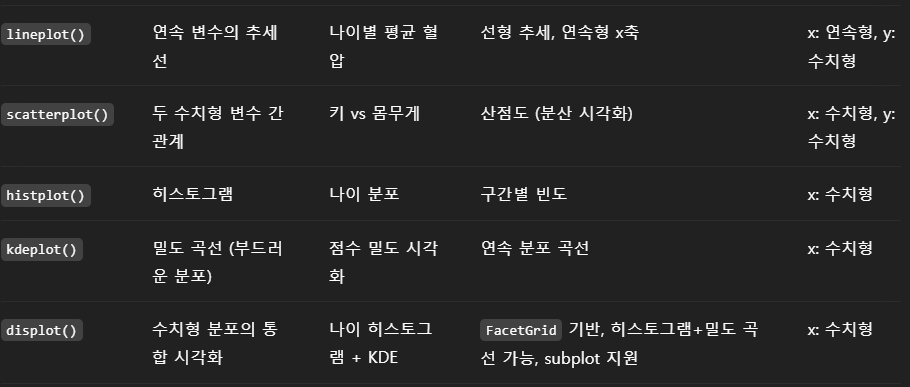
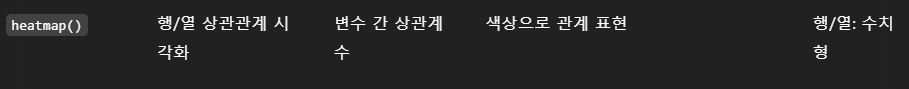

### **barplot()**

<Axes: xlabel='Sex', ylabel='BMI'>

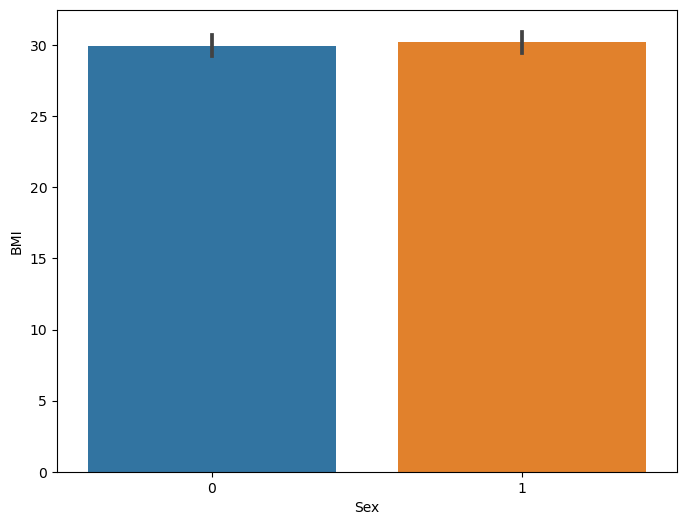

In [50]:
import seaborn as sns

# 성별에 따른 BMI
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Sex',y = 'BMI', data = df)

### **countplot()**

<Axes: xlabel='Sex', ylabel='count'>

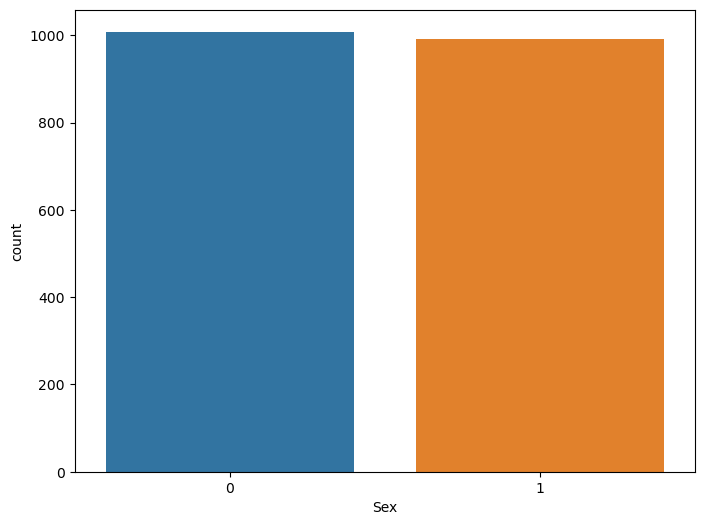

In [51]:
import seaborn as sns

# 성별 빈도수
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Sex', data = df)

<Axes: xlabel='Sex', ylabel='count'>

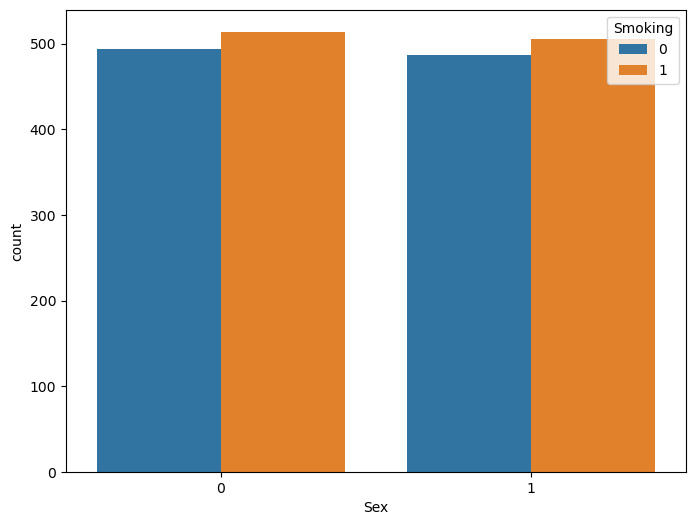

In [52]:
# 성별에 따른 흡연 여부 빈도수
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Sex', hue = 'Smoking', data = df)

<Axes: xlabel='Sex', ylabel='count'>

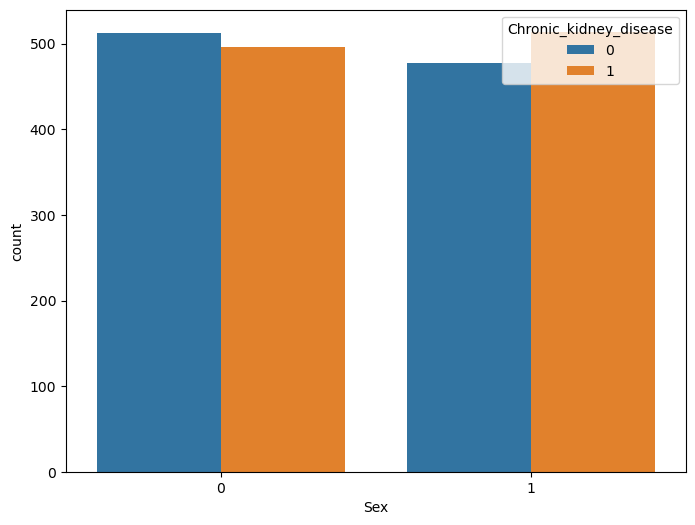

In [53]:
# 성별에 따른 만성 질환 여부 빈도수
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Sex', hue = 'Chronic_kidney_disease', data = df)

### **boxplot()**

<Axes: >

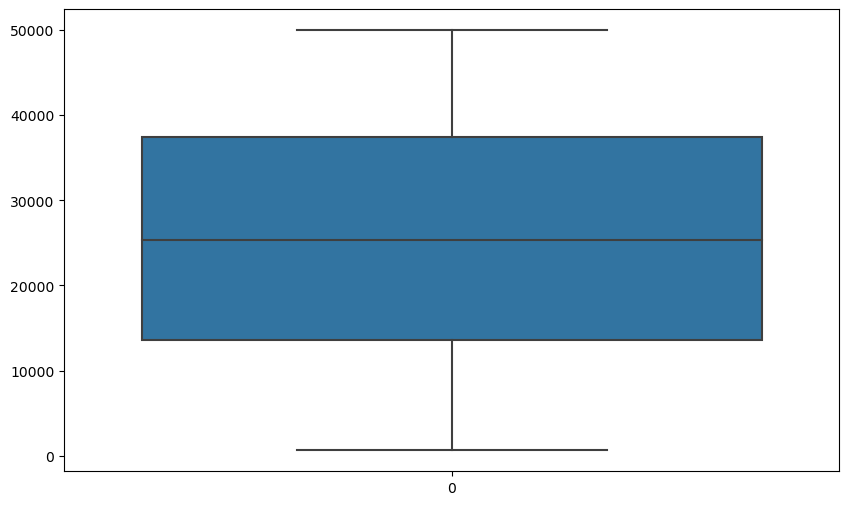

In [54]:
# 신체 활동 수준 상자 그림
plt.figure(figsize = (10, 6))
sns.boxplot(data = df['Physical_activity'])

<Axes: xlabel='Blood_Pressure_Abnormality', ylabel='Physical_activity'>

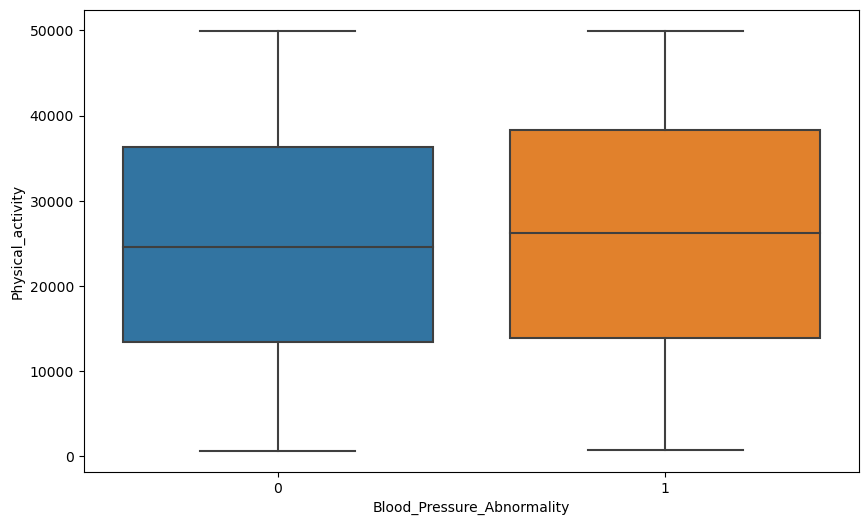

In [55]:
# 혈엽 이상 여부에 따른 신체 활동 수준 상자 그림
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Blood_Pressure_Abnormality', y = 'Physical_activity', data = df)

### **violinplot()**

<Axes: >

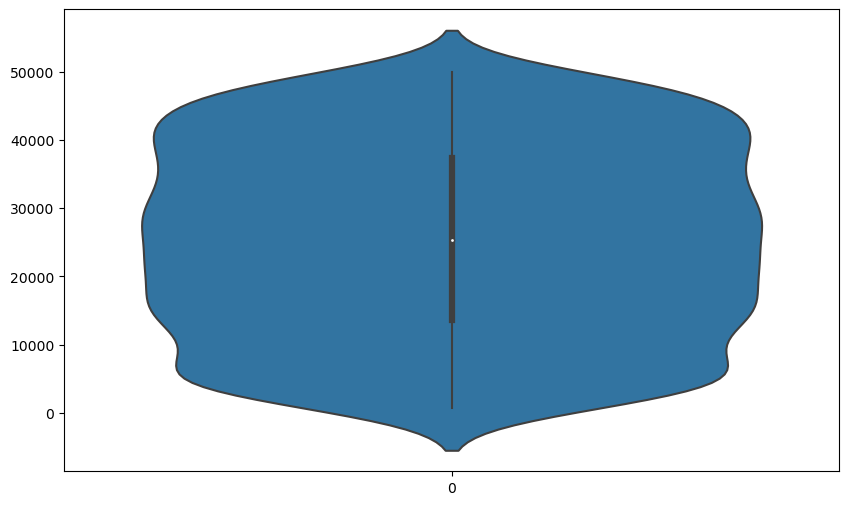

In [56]:
# 신체 활동 수준(데이터 밀집도 확인 가능)
plt.figure(figsize = (10, 6))
sns.violinplot(data = df['Physical_activity'])

<Axes: xlabel='Blood_Pressure_Abnormality', ylabel='Physical_activity'>

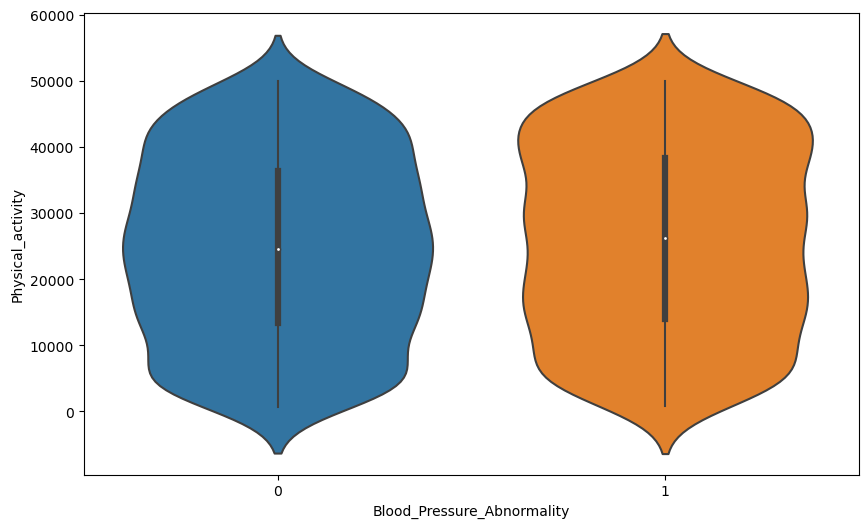

In [57]:
# 바이올린 플롯
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Blood_Pressure_Abnormality', y = 'Physical_activity', data = df)

### **히트맵**

<Axes: >

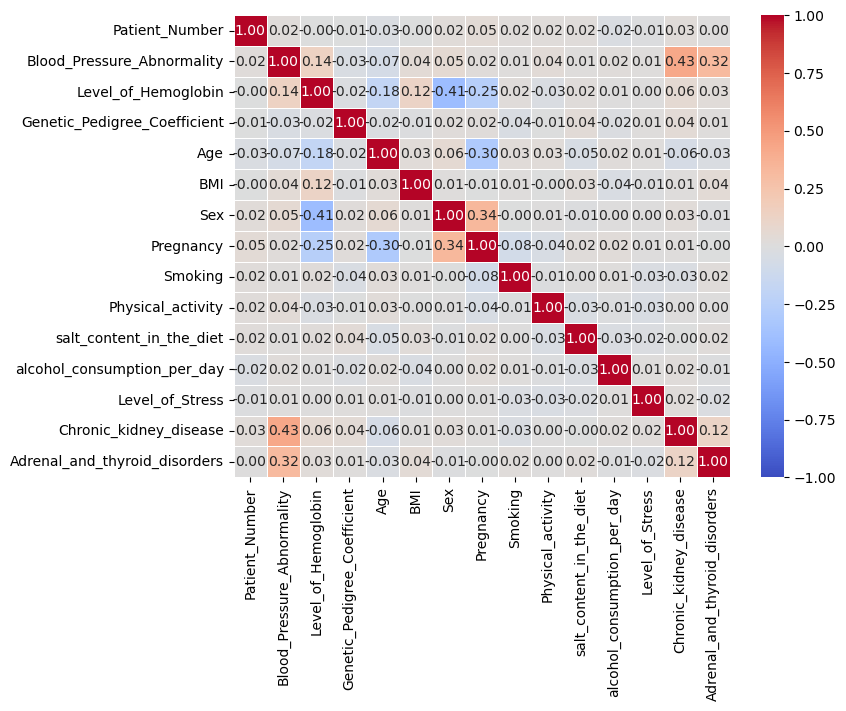

In [58]:
# 히트맵(상관관계) 상관 행렬 계산
corr_matrix = df.corr()

# 상관 행렬 히트맵 시각화
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, fmt = '.2f', linewidths = 0.5)

### **히스토그램**

<Axes: xlabel='Age', ylabel='Count'>

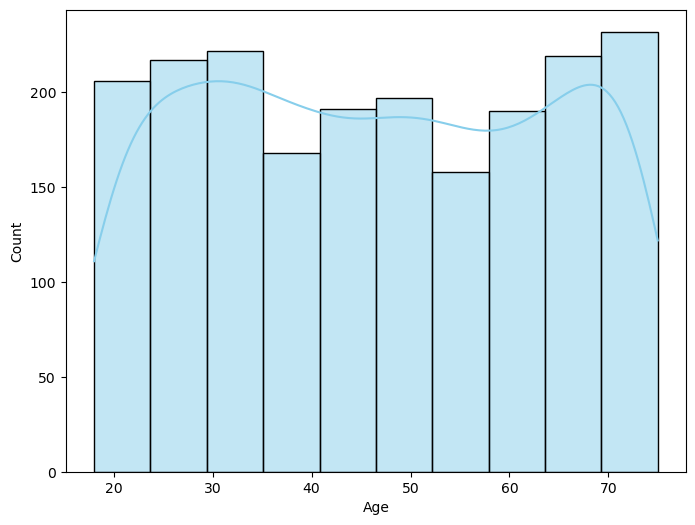

In [59]:
# 히스토그램 그리기
plt.figure(figsize = (8, 6))
sns.histplot(df['Age'], kde = True, bins = 10, color = 'skyblue')

### **lineplot**

<Axes: xlabel='Age', ylabel='Blood_Pressure_Abnormality'>

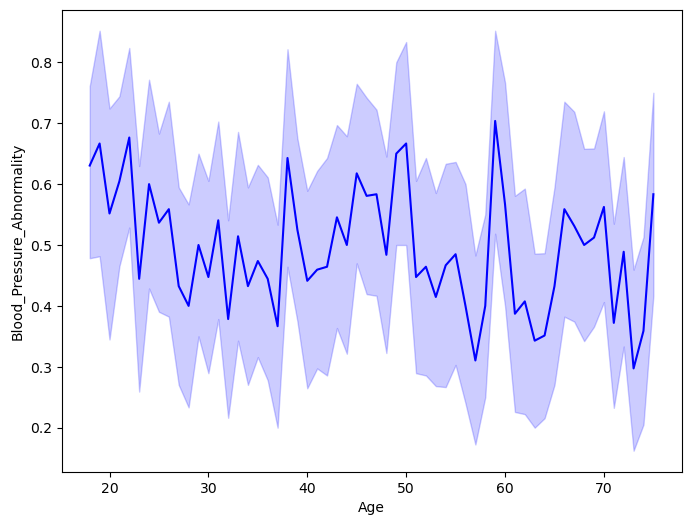

In [60]:
# lineplot(), 나이별 혈압 이상 여부
plt.figure(figsize = (8, 6))
sns.lineplot(x = 'Age', y = 'Blood_Pressure_Abnormality', data = df, color = 'blue')

<Axes: xlabel='Age', ylabel='BMI'>

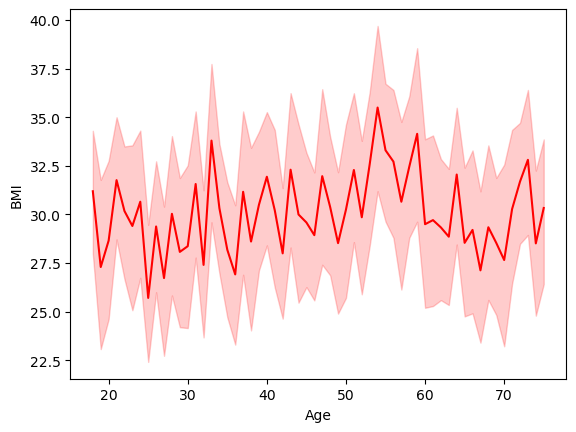

In [61]:
# lineplot(), 나이별 BMI
sns.lineplot(x = 'Age', y = 'BMI', data = df, color = 'red')

### **산점도**

<Axes: xlabel='Age', ylabel='Physical_activity'>

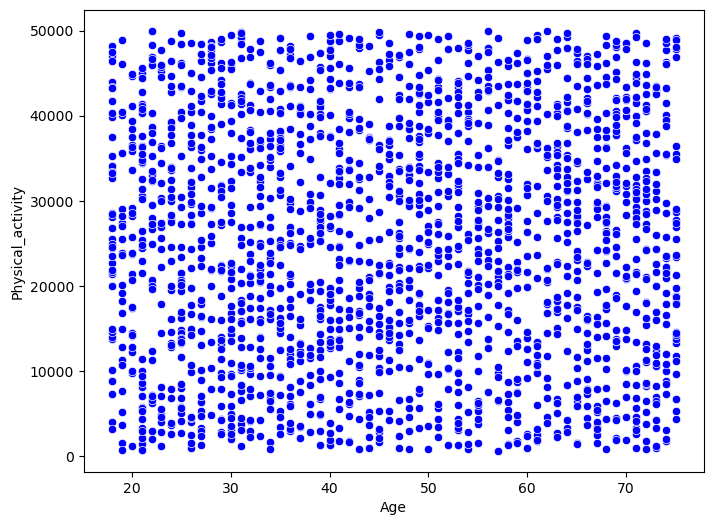

In [62]:
# 산점도, 나이 & 신체 활동수준
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Age', y = 'Physical_activity', data = df, color = 'blue')

<Axes: xlabel='Age', ylabel='alcohol_consumption_per_day'>

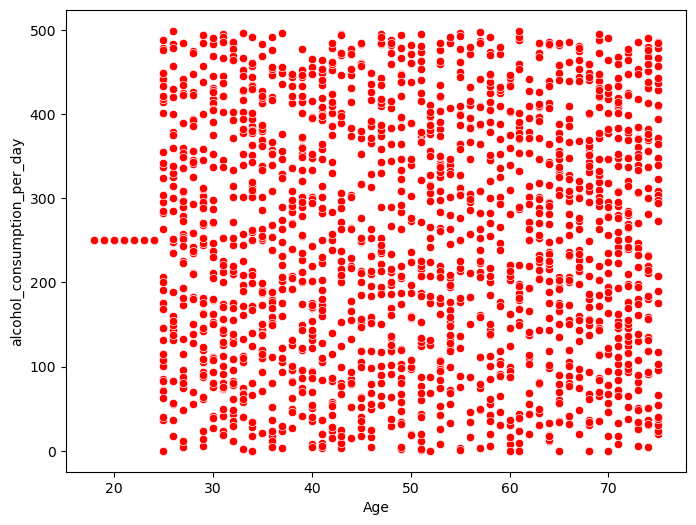

In [63]:
# 산점도, 나이 & 하루 알코올 섭취량
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Age', y = 'alcohol_consumption_per_day', data = df, color = 'red')

### **kdeplot()**

<Axes: xlabel='Age', ylabel='Density'>

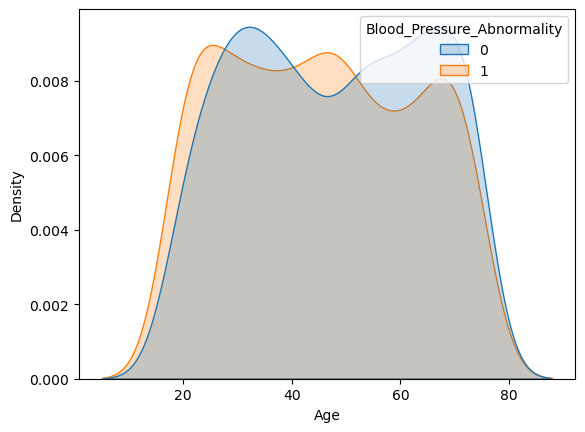

In [64]:
import seaborn as sns

# 협압이상 여부에 따른 나이 밀도 곡선
sns.kdeplot(x = 'Age', data = df, hue = 'Blood_Pressure_Abnormality', fill = True)

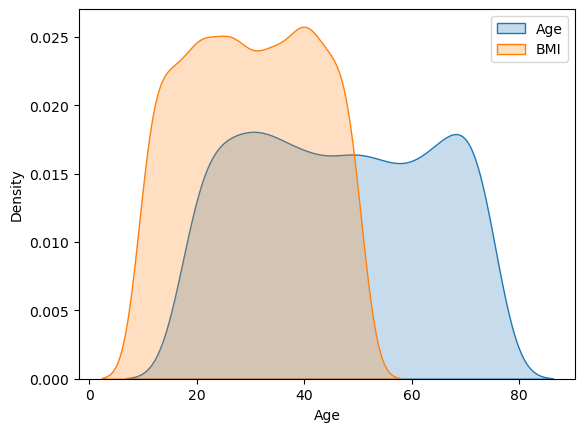

In [65]:
# BMI, 나이 밀도 그래프
sns.kdeplot(df['Age'], ax = plt.gca(), label = 'Age', fill = True)
sns.kdeplot(df['BMI'], ax = plt.gca(), label = 'BMI', fill = True)
plt.legend()
plt.show()

### **displot()**

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


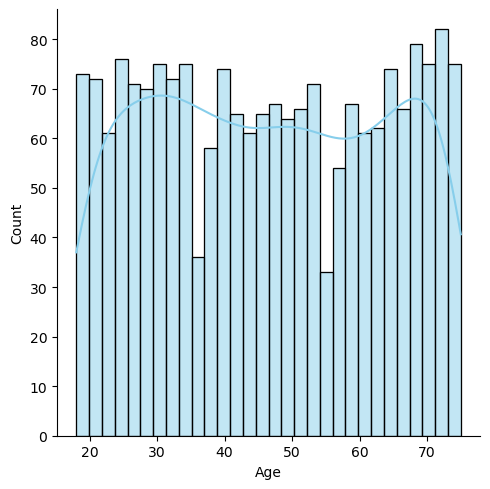

In [66]:
# 나이 분포 시각화
sns.displot(df['Age'], bins=30, kde=True, color='skyblue')

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


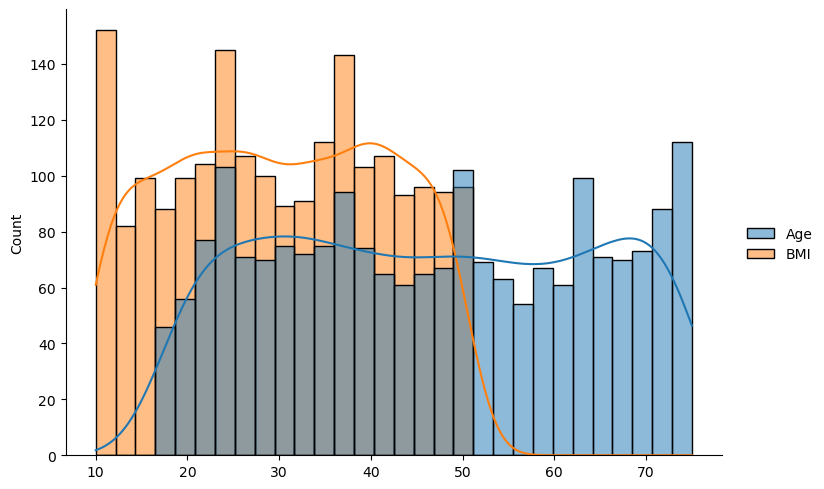

In [67]:
# 나이, BMI 시각화
sns.displot(df[['Age', 'BMI']], kde = True, bins = 30, aspect = 1.5)

---

### **DL_Classification**

In [68]:
# 레이블 확인
df['Blood_Pressure_Abnormality'].value_counts()

Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64

In [69]:
from sklearn.preprocessing import StandardScaler

# 피처, 레이블 데이터 나누기
X = df.drop('Blood_Pressure_Abnormality', axis = 1).values
y = df['Blood_Pressure_Abnormality'].values

# 데이터 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1600, 14), (400, 14), (1600,), (400,))

In [71]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.int64)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.int64)

In [72]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600]),
 torch.Size([400]))

In [74]:
class DiabetesDense(nn.Module):
    def __init__(self):
        super(DiabetesDense, self).__init__()
        self.fc1 = nn.Linear(14, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # 2 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = DiabetesDense()

In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [76]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.6615, Accuracy: 74.50%
Epoch 2/20, Loss: 0.5592, Accuracy: 74.50%
Epoch 3/20, Loss: 0.5135, Accuracy: 75.75%
Epoch 4/20, Loss: 0.4872, Accuracy: 76.50%
Epoch 5/20, Loss: 0.4637, Accuracy: 79.25%
Epoch 6/20, Loss: 0.4370, Accuracy: 80.00%
Epoch 7/20, Loss: 0.4054, Accuracy: 82.75%
Epoch 8/20, Loss: 0.3723, Accuracy: 85.50%
Epoch 9/20, Loss: 0.3466, Accuracy: 86.25%
Epoch 10/20, Loss: 0.3175, Accuracy: 88.50%
Epoch 11/20, Loss: 0.2995, Accuracy: 87.25%
Epoch 12/20, Loss: 0.2904, Accuracy: 88.50%
Epoch 13/20, Loss: 0.2800, Accuracy: 88.50%
Epoch 14/20, Loss: 0.2697, Accuracy: 88.00%
Epoch 15/20, Loss: 0.2646, Accuracy: 88.50%
Epoch 16/20, Loss: 0.2596, Accuracy: 89.75%
Epoch 17/20, Loss: 0.2543, Accuracy: 89.50%
Epoch 18/20, Loss: 0.2529, Accuracy: 89.75%
Epoch 19/20, Loss: 0.2468, Accuracy: 89.50%
Epoch 20/20, Loss: 0.2391, Accuracy: 89.25%
Training complete.


In [77]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average = 'weighted')
precision = precision_score(all_labels, all_predictions, average = 'weighted')
recall = recall_score(all_labels, all_predictions, average = 'weighted')


print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Confusion Matrix:
[[189  19]
 [ 24 168]]
F1 Score: 0.89
Precision: 0.89
Recall: 0.89


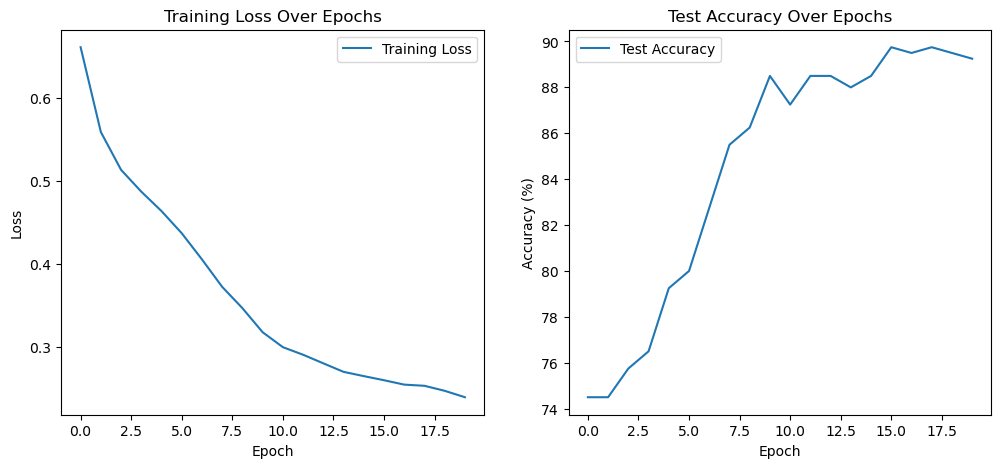

In [78]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()